In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from model import Net
from utils import data_loaders, train, test, triangular_plot,train_transform,test_transform

from torch.optim.lr_scheduler import StepLR






In [ ]:
!pip install torch-lr-finder


In [27]:
import torch.optim as optim

def hi_optimizer(model, lr):
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    return optimizer

In [19]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [20]:
from torchsummary import summary

net = Net()

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = net.to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
           Dropout-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
           Dropout-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
           Conv2d-10          [-1, 128, 16, 16]         147,584
      BatchNorm2d-11          [-1, 128, 16, 16]             256
           Conv2d-12          [-1, 256, 14, 14]         295,168
        MaxPool2d-13            [-1, 256, 7, 7]               0
      BatchNorm2d-14            [-1, 25

/content/model.py:48: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(f_x2)


In [28]:
train_losses = []
test_losses = []
batch_size = 512
train_loader, test_loader, sample_loader = data_loaders(batch_size, train_transform, test_transform)


optimizer= hi_optimizer(model, 0.001)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#CORRECT THIS CODE
show_images(sample_loader, classes)

In [29]:
from torch_lr_finder import LRFinder


model = net.to(device)
optimizer_testing = hi_optimizer(model, 0.0005)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model, optimizer_testing, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=0.1, num_iter=2500, step_mode="exp", diverge_th=20)

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/2500 [00:00<?, ?it/s]

/content/model.py:48: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(f_x2)


Learning rate search finished. See the graph with {finder_name}.plot()


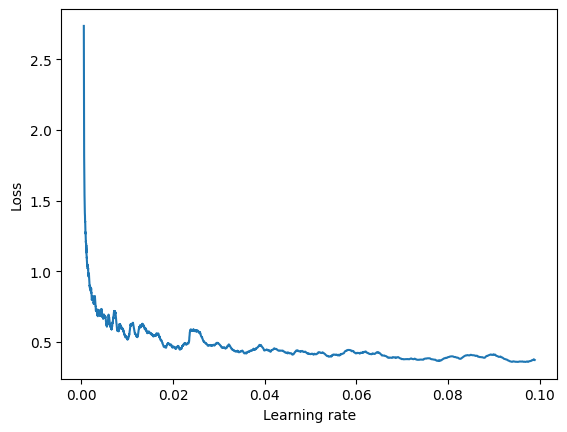

<Axes: xlabel='Learning rate', ylabel='Loss'>

In [30]:
lr_finder.plot(suggest_lr=False, log_lr=False)

In [ ]:

scheduler = optim.lr_scheduler.OneCycleLR(optimizer,
max_lr= 0.01, epochs=27, steps_per_epoch= 100 ,pct_start= 0.22 )
for epoch in range(1, 28):

    train(model, device, train_loader, optimizer, epoch, scheduler)

    test(model, device, test_loader)



    print('Epoch-{0} lr: {1}'.format(epoch,optimizer.param_groups[0]['lr']))

  0%|          | 0/98 [00:00<?, ?it/s]<ipython-input-11-3c0bbcd630e5>:48: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(f_x2)
Loss=0.034111034125089645 Batch_id=97 Accuracy=99.03: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]



Test set: Average loss: 0.3810, Accuracy: 8981/10000 (89.81%)

Epoch-1 lr: 0.001032523016150198


Loss=0.014031550846993923 Batch_id=97 Accuracy=98.94: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]



Test set: Average loss: 0.3853, Accuracy: 8978/10000 (89.78%)

Epoch-2 lr: 0.0027633898287842346


Loss=0.022056180983781815 Batch_id=97 Accuracy=98.99: 100%|██████████| 98/98 [00:26<00:00,  3.68it/s]



Test set: Average loss: 0.3761, Accuracy: 9016/10000 (90.16%)

Epoch-3 lr: 0.0051364283142014576


Loss=0.018762314692139626 Batch_id=97 Accuracy=98.99: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]



Test set: Average loss: 0.3913, Accuracy: 8937/10000 (89.37%)

Epoch-4 lr: 0.007526221197303283


Loss=0.04935882240533829 Batch_id=97 Accuracy=98.91: 100%|██████████| 98/98 [00:26<00:00,  3.66it/s]



Test set: Average loss: 0.3746, Accuracy: 9015/10000 (90.15%)

Epoch-5 lr: 0.00930293556042561


Loss=0.048726875334978104 Batch_id=97 Accuracy=98.90: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]



Test set: Average loss: 0.3876, Accuracy: 8983/10000 (89.83%)

Epoch-6 lr: 0.009998316100318639


Loss=0.02978348173201084 Batch_id=97 Accuracy=98.92: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]



Test set: Average loss: 0.4052, Accuracy: 8938/10000 (89.38%)

Epoch-7 lr: 0.009951961380434462


Loss=0.03130257874727249 Batch_id=97 Accuracy=99.03: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]



Test set: Average loss: 0.3821, Accuracy: 9006/10000 (90.06%)

Epoch-8 lr: 0.009798419730892363


Loss=0.040701862424612045 Batch_id=97 Accuracy=98.98: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]



Test set: Average loss: 0.3617, Accuracy: 9025/10000 (90.25%)

Epoch-9 lr: 0.00954251154975481


Loss=0.040782392024993896 Batch_id=97 Accuracy=98.97: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]



Test set: Average loss: 0.3863, Accuracy: 8997/10000 (89.97%)

Epoch-10 lr: 0.009189696247320881


Loss=0.011947130784392357 Batch_id=97 Accuracy=99.01: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]



Test set: Average loss: 0.3782, Accuracy: 9018/10000 (90.18%)

Epoch-11 lr: 0.00874750059935531


Loss=0.012043007649481297 Batch_id=97 Accuracy=99.09: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]



Test set: Average loss: 0.3785, Accuracy: 9035/10000 (90.35%)

Epoch-12 lr: 0.008225358174820143


Loss=0.05117029324173927 Batch_id=97 Accuracy=99.10: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]



Test set: Average loss: 0.3860, Accuracy: 9011/10000 (90.11%)

Epoch-13 lr: 0.007634408085085026


Loss=0.032862938940525055 Batch_id=97 Accuracy=99.11: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]



Test set: Average loss: 0.3928, Accuracy: 9001/10000 (90.01%)

Epoch-14 lr: 0.006987257347994422


Loss=0.04435350373387337 Batch_id=97 Accuracy=99.14: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]



Test set: Average loss: 0.3834, Accuracy: 9016/10000 (90.16%)

Epoch-15 lr: 0.006297711936391508


Loss=0.03577757999300957 Batch_id=97 Accuracy=99.12: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]



Test set: Average loss: 0.4103, Accuracy: 8981/10000 (89.81%)

Epoch-16 lr: 0.005580482248767869


Loss=0.015103337354958057 Batch_id=97 Accuracy=99.11: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]



Test set: Average loss: 0.3940, Accuracy: 8994/10000 (89.94%)

Epoch-17 lr: 0.0048508692853729525


Loss=0.02295265719294548 Batch_id=97 Accuracy=99.18: 100%|██████████| 98/98 [00:27<00:00,  3.63it/s]



Test set: Average loss: 0.3931, Accuracy: 9006/10000 (90.06%)

Epoch-18 lr: 0.0041244382247367945


Loss=0.03399107977747917 Batch_id=97 Accuracy=99.23: 100%|██████████| 98/98 [00:27<00:00,  3.63it/s]



Test set: Average loss: 0.3930, Accuracy: 9009/10000 (90.09%)

Epoch-19 lr: 0.003416686364352515


Loss=0.01662544347345829 Batch_id=97 Accuracy=99.21: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]



Test set: Average loss: 0.4007, Accuracy: 9008/10000 (90.08%)

Epoch-20 lr: 0.00274271250949707


Loss=0.014536944217979908 Batch_id=97 Accuracy=99.26: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]



Test set: Average loss: 0.3880, Accuracy: 9015/10000 (90.15%)

Epoch-21 lr: 0.0021168948632750125


Loss=0.014654545113444328 Batch_id=97 Accuracy=99.28: 100%|██████████| 98/98 [00:27<00:00,  3.63it/s]



Test set: Average loss: 0.3991, Accuracy: 9005/10000 (90.05%)

Epoch-22 lr: 0.0015525842896092724


Loss=0.03762020170688629 Batch_id=97 Accuracy=99.31: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]



Test set: Average loss: 0.3928, Accuracy: 9021/10000 (90.21%)

Epoch-23 lr: 0.00106181949294477


Loss=0.026390038430690765 Batch_id=97 Accuracy=99.34: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]



Test set: Average loss: 0.3923, Accuracy: 9031/10000 (90.31%)

Epoch-24 lr: 0.0006550701908709507


Loss=0.022126197814941406 Batch_id=97 Accuracy=99.39: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]



Test set: Average loss: 0.3958, Accuracy: 9031/10000 (90.31%)

Epoch-25 lr: 0.0003410137586831835


Loss=0.018512610346078873 Batch_id=97 Accuracy=99.29: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]



Test set: Average loss: 0.3954, Accuracy: 9034/10000 (90.34%)

Epoch-26 lr: 0.0001263501108303091


Loss=0.0283829253166914 Batch_id=97 Accuracy=99.34: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]



Test set: Average loss: 0.3943, Accuracy: 9034/10000 (90.34%)

Epoch-27 lr: 1.5658768469943832e-05


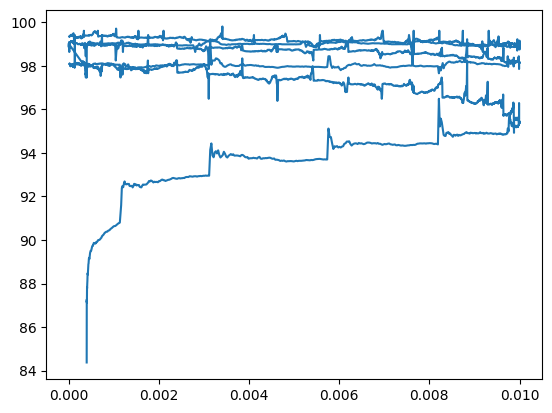

In [ ]:
# min_lr= 0.001125 , max_lr= 0.009
import matplotlib.pyplot as plt
plt.plot(lr_list, train_acc)


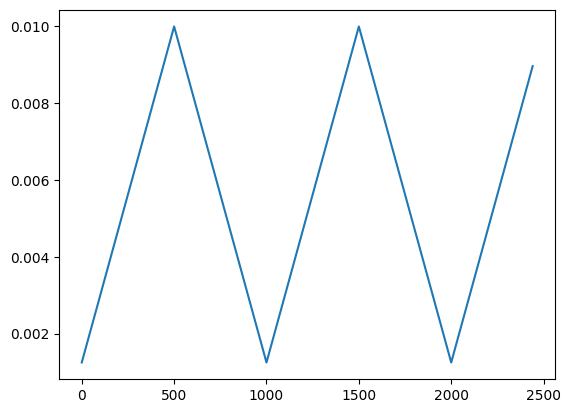

In [ ]:
# Plot a graph between LR and iterations

# import cyclic_plot

# cyclic_plot.triangular_plot(iterations= 2442, stepsize= 500, lr_max= 0.0099901336 , lr_min= 0.00124876)
triangular_plot(iterations= 2442, stepsize= 500, lr_max= 0.0099901336 , lr_min= 0.00124876)

In [ ]:
# define a list of class labels in the correct order
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  # replace this with the actual labels of your classes

import torch
import torchvision
%matplotlib inline

def get_wrong_predictions(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    wrong_correct = []
    wrong_predicted = []
    wrong_image_data = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            status = pred.eq(target.view_as(pred))
            # correct += status.sum().item()

            mistakes, _ = torch.where(status==False)
            if len(mistakes):
                m_data = data[mistakes]
                m_target = target[mistakes]
                m_output = output[mistakes]
                m_pred = pred[mistakes]
                correct = [x.item() for x in m_target.cpu().detach()]
                predicted = [x.item() for x in m_pred.cpu().detach()]
                image_data = [x for x in m_data.cpu().detach()]

                wrong_correct.extend(correct)
                wrong_predicted.extend(predicted)
                wrong_image_data.extend(image_data)

    return wrong_correct, wrong_predicted, wrong_image_data


def show_grid(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

def show_wrong_images(targets, predicts, images, size=30, grid=(5, 4)):
    img_data_temp = []
    wps = []
    actual_predicted = []

    for n, (wc, wp, wi) in enumerate(zip(targets, predicts, images)):
        wps.append(wp)
        img_data_temp.append(wi)
        actual_predicted.append((class_labels[wc], class_labels[wp])) # convert indices to class labels
        if n>18:
            break

    fig = plt.figure(figsize=(15,15))

    for i in range(len(img_data_temp)):
        ax = fig.add_subplot(grid[0], grid[1], i+1)
        ax.axis('off')
        ax.imshow(img_data_temp[i].permute(1, 2, 0)) # convert from (C,H,W) to (H,W,C) for displaying image
        ax.set_title('Actual: '+str(actual_predicted[i][0])+' / Predicted: '+str(actual_predicted[i][1])) # Set title as "actual label / predicted label"

    plt.show()




#Print the wrong predicted Image
targets, predicts, images = get_wrong_predictions(model, test_loader)
show_wrong_images(targets, predicts, images)


for model in model.items():
    targets, predicts, images = get_wrong_predictions(model, test_loader)
    show_wrong_images(targets, predicts, images)
    plt.show()